# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('datasets/instacart_orders.csv',sep=';')
products = pd.read_csv('datasets/products.csv',sep=';')
aisles = pd.read_csv('C:datasets/aisles.csv',sep=';')
departments = pd.read_csv('datasets/departments.csv',sep=';')
order_products = pd.read_csv('datasets/order_products.csv',sep=';')
                               

In [3]:
# mostrar información del DataFrame instacart_orders
orders.info(show_counts = True) # Mostrar informacion sobre el DF

orders_null = orders['days_since_prior_order'].isnull().sum()# Numero de nulos en variable "days_since_prior_order"
print()
print(f'Valores nulos days_since_prior_order: {orders_null}') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

Valores nulos days_since_prior_order: 28819


### orders Table
La variable "days_since_prior_order" es float.
- Cuenta con un total de 28819 valores nulos
  
Las demás variables aparentan estar bien, son de tipo int como deberían de ser por su naturaleza y no cuentan con nulos

In [4]:
# mostrar información del DataFrame products
products.info()

product_null = products['product_name'].isnull().sum()# Numero de nulos en variable "product_name"
nunique_products = products['product_name'].nunique()# Numero de valores unicos de la variable "product_name"
print()
print(f'Valores nulos product_name: {product_null},\nProductos unicos: {nunique_products}') 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

Valores nulos product_name: 1258,
Productos unicos: 48436


### product Table
La variable product_name es de tipo object(string)
- Cuenta con 1258 valores nulos
- No parece haber duplicados explícitos, ya que el número de registros es igual al número de valores únicos
  
En las demás variables no hay valores nulos y las tres cuentan con tipo de dato int lo cual es correcto

In [5]:
# mostrar información del DataFrame aisles
aisles.info()
nunique_aisles = aisles['aisle'].nunique() # Numero de valores unicos de la variable "aisle"
nunique_aisles_id = aisles['aisle_id'].nunique() # Numero de valores unicos de la variable "aisle_id"
print()
print(f"Valores únicos en variable aisle: {nunique_aisles}\nValores únicos en variable aisle_id: {nunique_aisles_id}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

Valores únicos en variable aisle: 134
Valores únicos en variable aisle_id: 134


### aisles Table
El DF parece estar completo, no hay valores nulos ni duplicados explícitos y los tipos de datos son correctos

In [6]:
# mostrar información del DataFrame departments
departments.info()

nunique_departments = departments['department'].nunique() # Numero de valores unicos de la variable "department"
nunique_departments_id = departments['department_id'].nunique() # Numero de valores unicos de la variable "department_id"
print()
print(f"Valores únicos en variable aisle: {nunique_departments}\nValores únicos en variable aisle_id: {nunique_departments_id}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

Valores únicos en variable aisle: 21
Valores únicos en variable aisle_id: 21


### departments Table
El DF parece estar completo, no hay valores nulos ni duplicados explícitos y los tipos de datos son correctos

In [7]:
# mostrar información del DataFrame order_products
order_products.info(show_counts = True)
add_to_cart_order_null = order_products['add_to_cart_order'].isnull().sum()# Numero de nulos en variable "add_to_cart_order"
print()
print(f'Valores nulos add_to_cart_order: {add_to_cart_order_null}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

Valores nulos add_to_cart_order: 836


### order_product Table
La variable add_to_cart_order cuenta con 836 valores nulos

## Conclusiones
La mayor parte de las variables de los DF aparentan tener los tipos de datos correctos y sin nulos aparentemente, a excepción de las variables:

La variable "days_since_prior_order" del DF "orders":
- Cuenta con un total de 28819 valores nulos

La variable "product_name" del DF "products"
- Cuenta con 1258 valores nulos

La variable "add_to_cart_order" del DF "order_product"
- Cuenta con 836 valores nulos

Se debe de revisar con detenimiento cada tabla para descubrir si están correctas

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
1. Revisar filas duplicadas
2. Revisar duplicados no explícitos
3. Eliminar o unificar estos duplicados
4. Revisar nulos
5. Sustituir o eliminar nulos
6. verificar integridad de las tablas finales

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

In [8]:

def eliminar_duplicados(df):
    duplicates = df.duplicated().sum()
    if duplicates >0:
        df.drop_duplicates(inplace=True)
        print(f'Se eliminaron {duplicates} duplicados')
    else:
        print('No hay filas duplicadas')


In [9]:
def ids_duplicados(df,id_stamp):
    unique_id = df[id_stamp].nunique() #contar id unicos
    print(f'{unique_id} order_id unicas')
    print(f"{df.shape[0]} registros")
    print(f'Hay {df.shape[0] - unique_id} {id_stamp} duplicados') #comparar id unicos con el total de registros


### `orders` data frame

In [10]:
# Revisa si hay pedidos duplicados
orders_duplicates = orders.duplicated()
print(f'Filas duplicadas: {orders_duplicates.sum()}')

Filas duplicadas: 15


In [11]:
orders[orders_duplicates]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Si hay duplicados, 15 duplicados.
- Vemos que los duplicados en el sales_reorders_user, provienen del mismo dia a la misma hora, miércoles a las 2:00 a.m.

In [12]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wensday_2am = orders[(orders['order_dow']==3) & (orders['order_hour_of_day']==2)] # Filtrar DF

print(f'Hay {wensday_2am.duplicated().sum()} duplicados') # Contar duplicados
print()

wensday_2am[wensday_2am.duplicated()]

Hay 15 duplicados



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [13]:
print(f'Duplicados explicitos {wensday_2am.duplicated().sum()}') # Contar duplicados

ids_duplicados(wensday_2am,'order_id') # Uso de funcion para verificar IDs duplicados

Duplicados explicitos 15
106 order_id unicas
121 registros
Hay 15 order_id duplicados


¿Qué sugiere este resultado?
- Los 15 valores duplicados vienen del mismo día y la misma hora, es recomendable verificar el porqué del error.
- Se revisó si había más order_id duplicados pero vemos que son los mismos 15

In [14]:
# Elimina los pedidos duplicados
eliminar_duplicados(orders)

Se eliminaron 15 duplicados


In [15]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

np.int64(0)

In [16]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
ids_duplicados(orders,"order_id") # Uso de funcion para verificar IDs duplicados

478952 order_id unicas
478952 registros
Hay 0 order_id duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos

1. Conté los duplicados por fila y salieron 15 duplicados
2. Comprobé si había más duplicados por order_id, la cual es la primary key.
    - Verificamos que solo había 15 duplicados
3. Elimine los duplicados
4. Verifique una vez más los duplicados y ya no apareció ninguno

### `products` data frame

In [17]:
# Verifica si hay filas totalmente duplicadas
products_duplicates = products.duplicated().sum()
print(f'{products_duplicates}')

0


In [18]:
# Revisa únicamente si hay ID de productos duplicados
ids_duplicados(products, 'product_id')

49694 order_id unicas
49694 registros
Hay 0 product_id duplicados


In [19]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(f'Nombres de producto duplicados {products['product_name'].str.upper().duplicated().sum()}')  

Nombres de producto duplicados 1361


In [20]:
# Unificar formato 'product_name'
products['product_name_u'] = products['product_name'].str.upper()

products_2 = products.copy() #Crear copia del DF, para un proceso alterno

In [21]:
# Econtar valores duplicados
products[products['product_name_u'].duplicated()]['product_name_u'].value_counts(sort=True, ascending=False, dropna=False)

product_name_u
NaN                                                1257
GREEN TEA WITH GINSENG AND HONEY                      2
BIOTIN 1000 MCG                                       1
CREAM OF MUSHROOM SOUP                                1
CINNAMON ROLLS WITH ICING                             1
                                                   ... 
HIGH PERFORMANCE ENERGY DRINK                         1
ORIGINAL PANCAKE & WAFFLE MIX                         1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       1
SPRING WATER BODY WASH                                1
BURRITO- STEAK & CHEESE                               1
Name: count, Length: 104, dtype: int64

Vemos que hay 1257 productos sin identificar, de los 1361 duplicados

In [22]:
products[products['product_name_u'].isna()].sample(15)

,product_id,product_name,aisle_id,department_id,product_name_u
25277,25278,NaN,100,21,NaN
6512,6513,NaN,100,21,NaN
29480,29481,NaN,100,21,NaN
37299,37300,NaN,100,21,NaN
33282,33283,NaN,100,21,NaN
2197,2198,NaN,100,21,NaN
17655,17656,NaN,100,21,NaN
24771,24772,NaN,100,21,NaN
12254,12255,NaN,100,21,NaN
35933,35934,NaN,100,21,NaN


In [23]:
products[(products['department_id']==21) & (products['aisle_id']==100)]['product_name_u'].value_counts(dropna=False)

product_name_u
NaN    1258
Name: count, dtype: int64

Nos encontramos con que los 1258 productos Nan vienen del mismo pasillo y departamento. 

- Los productos sin nombre se asigan a un departamento y pasillo que no existen.
- Los productos Nan conservaran sus indices individuales, por que estos pueden ser productos existentes y borrarlos con el tiempo esto generara inconcistencias en otras tablas, al momento de agregar los nombres faltantes.



In [24]:
products[products['product_name_u']=='BIOTIN 1000 MCG']

,product_id,product_name,aisle_id,department_id,product_name_u
41,42,Biotin 1000 mcg,47,11,BIOTIN 1000 MCG
2058,2059,Biotin 1000 Mcg,47,11,BIOTIN 1000 MCG


In [25]:
products[products['product_name_u']=='GREEN TEA WITH GINSENG AND HONEY']

,product_id,product_name,aisle_id,department_id,product_name_u
2037,2038,Green Tea with Ginseng and Honey,94,7,GREEN TEA WITH GINSENG AND HONEY
5455,5456,Green Tea With Ginseng and Honey,96,20,GREEN TEA WITH GINSENG AND HONEY
19813,19814,Green Tea With Ginseng And Honey,94,7,GREEN TEA WITH GINSENG AND HONEY


Vemos que en la mayoria de registros con nombre duplicados, tienen el mismo pasillo y departamento, a excepcion con 'GREEN TEA WITH GINSENG AND HONEY' pero sale 2 veces con el mismo registro y nos quedaremos con el primero. No sabemos si esto ocurre en mas de una ocasión, pero al eliminar duplicados por product_id o product_name solo nos quedaremos con los primeros datos.

In [26]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products[products['product_name_u'].duplicated()]['product_name_u'].value_counts(sort=True, ascending=False))
print()
print(f'Valores duplicados: {products[products['product_name_u'].duplicated()]['product_name_u'].value_counts(sort=True, ascending=False).sum()}')

product_name_u
GREEN TEA WITH GINSENG AND HONEY                   2
BIOTIN 1000 MCG                                    1
CREAM OF MUSHROOM SOUP                             1
CINNAMON ROLLS WITH ICING                          1
AMERICAN CHEESE SLICES                             1
                                                  ..
HIGH PERFORMANCE ENERGY DRINK                      1
ORIGINAL PANCAKE & WAFFLE MIX                      1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR    1
SPRING WATER BODY WASH                             1
BURRITO- STEAK & CHEESE                            1
Name: count, Length: 103, dtype: int64

Valores duplicados: 104


# Unificar IDs
Se hiciernon 2 procesos distintos, el primero es como se me ocurrio como lo podia hacer y el segundo es tras una investigacion
## Proceso 1
No se encontraron filas duplicadas completas, pero contamos con muchos nombres de producto repetidos con diferentes Ids. 
Simplemente eliminarlos no es viable ya que este dato se usa en otras tablas por lo que debemos de unificar los Ids.
- Se tomara el primer 'product_id' que aparezca por 'producto_name' repetido.

In [27]:
# Lista de nombres duplicados
product_name_duplicates = products[products['product_name_u'].duplicated()] #DF de duplicados
product_name_duplicates_list = product_name_duplicates['product_name_u'].unique().tolist() # lista de 'product_name' duplicados
product_name_duplicates_list.remove(np.nan) # eliminar Nan
product_name_duplicates_list[0:5] # Sample


['BIOTIN 1000 MCG',
 'GREEN TEA WITH GINSENG AND HONEY',
 'CREAM OF MUSHROOM SOUP',
 'CINNAMON ROLLS WITH ICING',
 'AMERICAN CHEESE SLICES']

In [28]:
correct_id = {} #diccionario con nombre y id de producto correctos
to_replace = {} #diccionario anidado, con los product id incorrectos
for index in products.index: 
    if (products['product_name_u'].loc[index] in product_name_duplicates_list): #Condicion, solo nombres de producto duplicados

        if products['product_name_u'].loc[index] not in correct_id: #Condicion, no existe el nombre en el diccionario
            # agregar producto y id correctos
            correct_id[products['product_name_u'].loc[index]] = int(products['product_id'].loc[index]) 
            # Crear llave de los product_id incorrectos
            to_replace[products['product_name_u'].loc[index]] = []
        else:
            # Llenar diccionario con product_id incorrectos
            to_replace[products['product_name_u'].loc[index]].append(int(products['product_id'].loc[index]))
        
    

In [29]:
# Numero de filas completamente duplicadas antes
products.duplicated().sum()

np.int64(0)

In [30]:
correct_id['FRESH SCENT DISHWASHER DETERGENT WITH DAWN']

186

In [31]:
# Unificar IDs
cambios = 0
for key, item in correct_id.items():
    condicion = products['product_name_u'] != key
    products['product_id'] = products['product_id'].where(condicion, item)
    cambios+=1
print(f'Se realizaron {cambios} cambios')

Se realizaron 103 cambios


In [32]:
print(f'Product_id dupulicados tras sustitucion: {products['product_id'].duplicated().sum()}')  

Product_id dupulicados tras sustitucion: 104


In [33]:
products.drop_duplicates(subset=['product_id'],inplace=True) # Eliminar duplicados

In [34]:
#contar valores duplicados
products[products['product_name_u'].duplicated()]['product_name_u'].value_counts(sort=True, ascending=False, dropna=False)

product_name_u
NaN    1257
Name: count, dtype: int64

In [35]:
# revisar integridad de df
products.head()

,product_id,product_name,aisle_id,department_id,product_name_u
0,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES
1,2,All-Seasons Salt,104,13,ALL-SEASONS SALT
2,3,Robust Golden Unsweetened Oolong Tea,94,7,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,5,Green Chile Anytime Sauce,5,13,GREEN CHILE ANYTIME SAUCE


## Proceso 2
Proceso encontrado tras investigacion

In [36]:
products_2[products_2['product_name_u'].duplicated()]['product_name_u'].value_counts(sort=True, ascending=False, dropna=False)

product_name_u
NaN                                                1257
GREEN TEA WITH GINSENG AND HONEY                      2
BIOTIN 1000 MCG                                       1
CREAM OF MUSHROOM SOUP                                1
CINNAMON ROLLS WITH ICING                             1
                                                   ... 
HIGH PERFORMANCE ENERGY DRINK                         1
ORIGINAL PANCAKE & WAFFLE MIX                         1
ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       1
SPRING WATER BODY WASH                                1
BURRITO- STEAK & CHEESE                               1
Name: count, Length: 104, dtype: int64

In [37]:
# 1) Define el ID canónico por nombre (p. ej. el mínimo product_id)
canon_id = products_2.groupby("product_name_u")["product_id"].transform("min")

# 2) Crear DF de sustitucion product_id_canon y product_id
condicion = products_2["product_name_u"].notna() # Excluir 'product_name_u' == nan
tmp = products_2.loc[condicion, ["product_name_u", "product_id"]].copy() # Crear DF tmp con ids anteriores y nombre de producto
tmp["product_id_canon"] = canon_id.loc[condicion] # Agragar Ids correctos

# 3) Asigna el ID canónico solo donde haya nombre
products_2["product_id"] = np.where(products_2["product_name_u"].notna(), canon_id, products_2["product_id"])

In [38]:
tmp[tmp['product_id'] != tmp['product_id_canon']]

,product_name_u,product_id,product_id_canon
2058,BIOTIN 1000 MCG,2059,42.0
5455,GREEN TEA WITH GINSENG AND HONEY,5456,2038.0
5558,CREAM OF MUSHROOM SOUP,5559,5439.0
7558,CINNAMON ROLLS WITH ICING,7559,2957.0
9037,AMERICAN CHEESE SLICES,9038,516.0
...,...,...,...
49689,HIGH PERFORMANCE ENERGY DRINK,49690,22541.0
49690,ORIGINAL PANCAKE & WAFFLE MIX,49691,25893.0
49691,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,49692,32861.0
49692,SPRING WATER BODY WASH,49693,36790.0


In [39]:
products_2.drop_duplicates(subset=['product_id'],inplace=True)

In [40]:
#contar valores duplicados
products_2[products_2['product_name_u'].duplicated()]['product_name_u'].value_counts(sort=True, ascending=False, dropna=False)

product_name_u
NaN    1257
Name: count, dtype: int64

In [41]:
products_2.head()

,product_id,product_name,aisle_id,department_id,product_name_u
0,1.0,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES
1,2.0,All-Seasons Salt,104,13,ALL-SEASONS SALT
2,3.0,Robust Golden Unsweetened Oolong Tea,94,7,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4.0,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,5.0,Green Chile Anytime Sauce,5,13,GREEN CHILE ANYTIME SAUCE


Solo se mantienen los productos nan como duplicados, estos se modificaran en su respectivo apartado, mas adelante

Describe brevemente tus hallazgos y lo que hiciste con ellos.
## Proceso 
1. Verifique si hay filas duplicadas, no se encontró ninguna
2. Revise si había product_id duplicados, no se encontró ninguno
3. Comprobé si había nombres de producto duplicados, se establecieron en mayúsculas para mantener uniformidad
    - Se encontraron 1361 nombres duplicados
        -	1257 son valores Nan, lo cuales no se modificaran sus Ids, ya que estos son productos reales a los que falta registrar
        -	Los 104 valores restantes son duplicados
4. Procesos de unificación de Id
    1. Proceso independiente
        1. Se creo una lista con los product_name duplicados, sin incluir los nombres Nan
        2. Ciclo para crear 2 diccionarios
	       * duplicates_names_dict: cuenta con el ‘product_name’:’product_id’ correctos
	       * to_replace: Diccionario con listas anidadas con la estructura ‘product_name’:[’product_id’, incorrectos]
        3. sustitución de product_id correcto
        4. Eliminación de duplicados por ‘product_id’
    2. Proceso tras Investigacion
        1.	Generar una variable nueva ‘canon_id’ mediante group by y transform para quedarnos con un solo ID, en este caso se eligió el mínimo
        2.	Crear un Df con los Id originales y los correctos, solo de los productos a los que se cambio
        3.	Asignar el Id_canonico al DF products_2(copia)
        4.	Eliminar id duplicados



### `departments` data frame

In [42]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

np.int64(0)

In [43]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departments['department_id'].duplicated().sum()

np.int64(0)

In [44]:
# Revisar si hay nombres de departemento duplicadas
departments['department'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron duplicados totales ni por columna

### `aisles` data frame

In [45]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

np.int64(0)

In [46]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [47]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

np.int64(0)

In [48]:
# Revisar si hay nombres de pasillo duplicadas
aisles['aisle'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron duplicados totales ni por columna

### `order_products` data frame

In [49]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [50]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

np.int64(0)

In [51]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

order_products['order_id'].duplicated().sum()

np.int64(4094961)

In [52]:
order_products['product_id'].duplicated().sum()

np.int64(4499434)

In [53]:
order_products[['product_id','order_id']].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al revisar las columnas por serapado, vemos que hay muchos duplicados, pero es normal por la estructura del DF. Este DF no tiene una primery key, este esta consituido por estructurado por dos identificadores externos, product_id y order_id.

En esencia una order_id puede llvar varios productos diferentes, es por eso que se repiten.

Para ver si habia ordenes con producto duplicados se reviso solo esa seccion y vemos que no tienen duplicados. Pero se tiene que arreglar los product_id incorrectos que se cambiaron en el proceso de unificacion.

## Proceso 1

In [54]:
# Diccionario con nombre y id de producto correctos
order_products_2 = order_products.copy()

In [55]:
for key, value in to_replace.items():
    order_products['product_id'] = order_products['product_id'].replace(to_replace[key],correct_id[key])

    

## Proceso 2

In [56]:
mapping_df = (
    tmp.loc[tmp["product_id"] != tmp["product_id_canon"], ["product_id", "product_id_canon"]] #Filtrar tmp product_id != product_id_canon
      .drop_duplicates() #eliminar duplicados, si es que hay
      .rename(columns={"product_id": "old_id", "product_id_canon": "new_id"}) # Renombrar columnas
)

id_map = dict(zip(mapping_df["old_id"], mapping_df["new_id"])) #crear diccionario
# zip() empareja las columnas 
# dict() crea el diccionario

In [57]:
order_products_2["product_id"] = order_products["product_id"].replace(id_map)

Al comparar los procesos 1 y 2, podemos ver que el el segundo es mucho mas eficiente que el primero pero con ambos llegamos al mismo resultado. La diferencia recae en el poder de la indexacion, ya que no utilizamos ciclos que entorpecen el tiempo computacional.


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [58]:
# Encuentra los valores ausentes en la columna 'product_name'
products.isna().sum()

product_id           0
product_name      1258
aisle_id             0
department_id        0
product_name_u    1258
dtype: int64

Describe brevemente cuáles son tus hallazgos.

Como ya se habia descubierto anteriormente hay 1258 valores Nan en 'product_name'

In [59]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products['aisle_id']==100]


,product_id,product_name,aisle_id,department_id,product_name_u
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Describe brevemente cuáles son tus hallazgos.

Todos los valores faltantes se enuectran en el aisle_id 100

In [60]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products['department_id']==21]


,product_id,product_name,aisle_id,department_id,product_name_u
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Describe brevemente cuáles son tus hallazgos.

Todos los registros con product_name nan se encuentran en el pasillo 100 y el departamento 21.

El aisle_id == 100	department_id == 21 son valores que seguramente no existen y ahi se asginan aquellos productos sin nombre

In [61]:
departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


In [62]:
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.

El departamento 21 y pasillo 100 son dedicados a registros en los que no se cuenta con el nombre del producto o ubicacion desconocida

In [63]:
products.head()

,product_id,product_name,aisle_id,department_id,product_name_u
0,1,Chocolate Sandwich Cookies,61,19,CHOCOLATE SANDWICH COOKIES
1,2,All-Seasons Salt,104,13,ALL-SEASONS SALT
2,3,Robust Golden Unsweetened Oolong Tea,94,7,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,5,Green Chile Anytime Sauce,5,13,GREEN CHILE ANYTIME SAUCE


In [64]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name_u'].replace(np.nan, 'Unknown')

products = products.drop(columns=['product_name_u'])

In [65]:
products[products['product_name'].duplicated()]['product_name'].value_counts(sort=True, ascending=False, dropna=False)

product_name
Unknown    1257
Name: count, dtype: int64

In [66]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reviso los valores faltantes en 'product_name' encontrados anteriormente, se descubrio revisando las tablas de aisles y departments que los id 100 y 21 respectivamente son apartados para valores faltantes.

### `orders` data frame

In [67]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [68]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [69]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
((orders['order_number'] == 1) & orders['days_since_prior_order'].isna()).sum()

np.int64(28817)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se revisaron valores ausentes, habia un total de 28817 en 'days_since_prior_order', esto puede deberse a dos cosas:
- Valores faltantes
- Primera orden del cliiente, por lo tato debe de estar vacia

Se conto el numero de veces que el numero de orden es == 1 y la variable 'days_since_prior_order' es na.
- El resultado es el mismo 28817, por lo tanto no son valores ausentes son intencionados.

### `order_products` data frame

In [70]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [71]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].agg(['min', 'max'])


min     1.0
max    64.0
Name: add_to_cart_order, dtype: float64

Describe brevemente cuáles son tus hallazgos.

Vemos que la variable 'add_to_cart_order' tiene un maximo de 64 productos, y un minimo de 1.

In [72]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_orders_cart_na = order_products[order_products['add_to_cart_order'].isna()]['order_id'] # filtro de productos nan, guardar order_id
id_orders_cart_na = id_orders_cart_na.drop_duplicates().tolist() # Eliminar duplicados y convertirlo a una lista

In [73]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
add_to_cart_na = order_products[(order_products['order_id'].isin(id_orders_cart_na))] # Crear filtro product_id en la lista id_orders_cart_na
add_to_cart_na.groupby(by = 'order_id')['product_id'].count().sort_values(ascending = False) #Agrupacion, conteo y ordenamiento



order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
2170451     65
2729254     65
2621907     65
2652650     65
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

Vemos que todos los order_id con valores nan en la variable 'add_to_cart_order' cuentan con mas de 64 productos. Al parecer la variable 'add_to_cart_order' esta capada en 64 y aquellos pedidos con mas de 64 productos pierde la continuidad


In [74]:
# Remplaza los valores ausentes en la columna 'add_to_cart_order' con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

In [75]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se cambiaron los valores nan de la variable add_to_cart_order por 999 y se convirtio el tipo de la columna a int

## Conclusiones

Durante el analisis de nulos se identificaron puntos clave sobre la estructura y patrones de los df. En products, los valores nulos de  'product_name' se concentran en un pasillo y departamento especificos reservados para productos sin identificar, estos valores nulos fueron sustituidos con 'unknown'. En orders, los nulos de la variable  'days_since_prior_order' son intencionados, ya que estos representan cuando un cliente hace su primera compra, se conservan para no alterar la logica temporal del df. En 'order_products', los valores nulos de la variable  'add_to_cart_order' se deben a la estructura de la variable, esta capada a 64, esto ocaciona que en ordenes con mas de 64 productos se registren como nulos, se remplazaron con 999 para mantener la concistencia.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [76]:
orders['order_dow'].agg(['min','max'])

min    0
max    6
Name: order_dow, dtype: int64

In [77]:
orders['order_hour_of_day'].agg(['min','max'])

min     0
max    23
Name: order_hour_of_day, dtype: int64

Escribe aquí tus conclusiones

Los valores de las variables order_hour_of_day y order_dow, tienen los rangos correctos 0 a 24 y 0 a 6 respectivamente

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [78]:
#Filtrar
orders[orders['order_hour_of_day']==0]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
23,3406282,19356,21,0,0,14.0
155,957214,111483,15,1,0,9.0
524,3084302,132558,21,6,0,30.0
639,3156097,38798,34,6,0,12.0
886,983672,53782,23,0,0,4.0
...,...,...,...,...,...,...
477530,1530369,102815,6,1,0,7.0
478053,686269,9959,9,2,0,3.0
478054,1879829,56767,8,6,0,9.0
478363,1573132,45639,30,5,0,5.0


In [79]:
clients_per_hour = orders.groupby('order_hour_of_day')['user_id'].count()

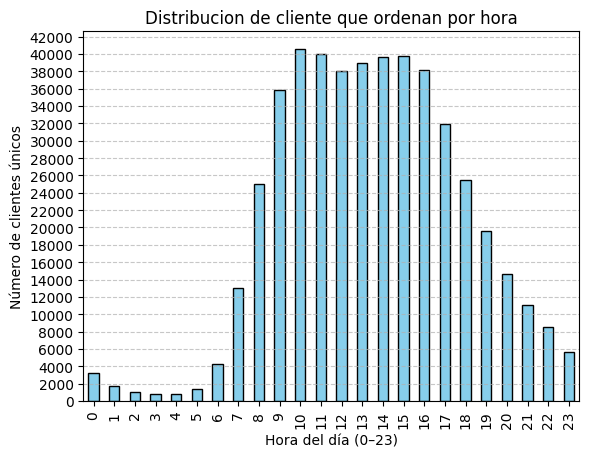

In [80]:

clients_per_hour.plot(kind='bar', yticks=range(0,43000,2000), color="skyblue", edgecolor="black",
                title = 'Distribucion de cliente que ordenan por hora',
                xlabel='Hora del día (0–23)', ylabel='Número de clientes únicos')
plt.grid(axis="y", linestyle="--", alpha=0.7)

Escribe aquí tus conclusiones

La distribución de pedidos a lo largo del día sigue un patrón lógico de consumo. Entre las 9 h y las 17 h se concentra la mayor actividad, alcanzando dos picos principales: alrededor de las 11 h (desayuno) y de las 15 h (comida). En contraste, la madrugada (0 h a 6 h) muestra la menor actividad. Como es de esperar, las órdenes se agrupan en torno a las principales comidas del día, con un descenso moderado a partir de las 18h.

### [A3] ¿Qué día de la semana compran víveres las personas?

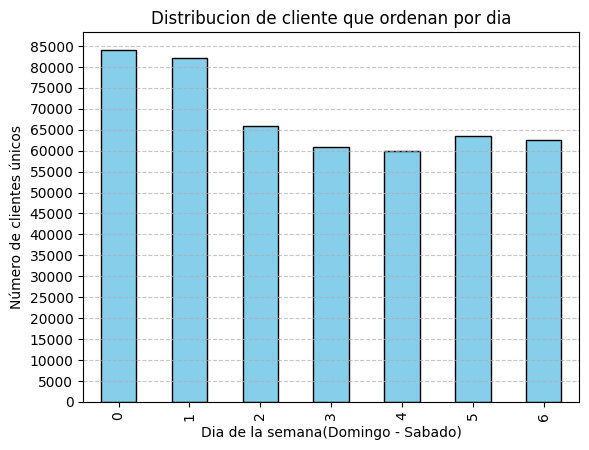

In [81]:
clients_per_day = orders.groupby('order_dow')['user_id'].count()


clients_per_day.plot(kind='bar', yticks=range(0,86000,5000), color="skyblue", edgecolor="black",
                title = 'Distribucion de cliente que ordenan por dia',
                xlabel='Dia de la semana(Domingo - Sabado)', ylabel='Número de clientes únicos')
plt.grid(axis="y", linestyle="--", alpha=0.7)

Escribe aquí tus conclusiones

La mayor concentración de pedidos ocurre el domingo (~84 000) y el lunes (~83 000). De martes a sabado la actividad baja considerablemente y osila entre ~60,000-65 000.
Este patrón sugiere que los clientes realizan sus compras principales al inicio de la semana, utilizando el domingo  y el lunes como días de preparación y arranque. En consecuencia, estos días resultan los más adecuados para promociones.



### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

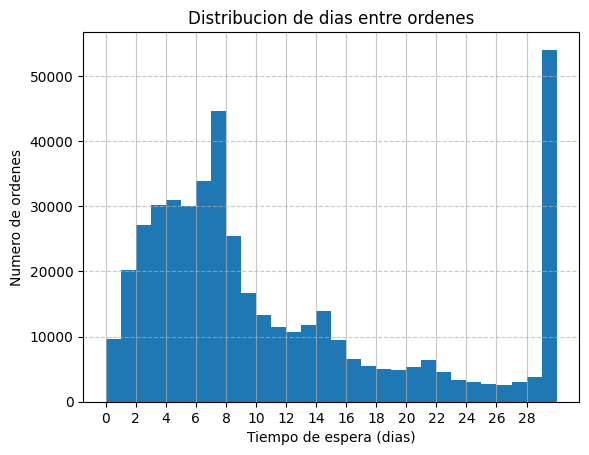

In [82]:
orders.plot(y='days_since_prior_order', kind='hist', bins=30, xticks=range(0,30,2),
            title= 'Distribucion de dias entre ordenes', xlabel='Tiempo de espera (dias)', ylabel='Numero de ordenes', 
            legend=False)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="-", alpha=0.7)

In [83]:
orders['days_since_prior_order'].agg(['min','max','mean'])

min      0.000000
max     30.000000
mean    11.101814
Name: days_since_prior_order, dtype: float64

Escribe aquí tus conclusiones

La distribución muestra una clara concentración de pedidos entre los 3 y 8 días posteriores a la compra, lo que refleja hábitos de recompra frecuentes. Destacan dos picos específicos: a los 7 días, indicando compras semanales, y a los 30 días, vinculadas a compras mensuales. Estos patrones de consumo regulares son clave para diseñar campañas de marketing dirigidas, ajustadas a la frecuencia de compra de los clientes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [84]:
orders_sw = orders[orders['order_dow'].isin([3,6])][['user_id','order_dow','order_hour_of_day']]

clients_sw = orders_sw.groupby(['order_dow','order_hour_of_day'])['user_id'].count()


clients_sw = clients_sw.unstack('order_dow').rename(columns={3:'Wendsday',6:'Saturday'})

<Figure size 640x480 with 0 Axes>

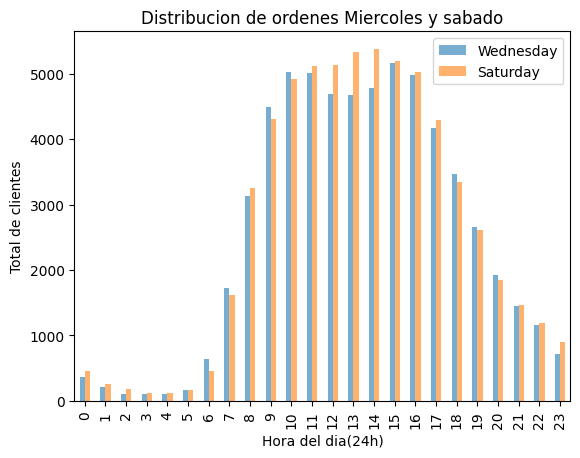

In [85]:
plt.figure()

clients_sw.plot( kind='bar', alpha = 0.6,
                        title='Distribucion de ordenes Miercoles y sabado', xlabel='Hora del dia(24h)', ylabel='Total de clientes')

plt.legend(['Wednesday', 'Saturday'])
plt.show()

Escribe aquí tus conclusiones

La distribución de pedidos en miércoles y sábado a lo largo del día es muy similar: alcanza sus máximos entre las 10 y 11h, se mantiene alta hasta las 16h y luego desciende gradualmente hacia los mínimos de la madrugada. La diferencia principal recae en la franja de 12 a 14h, durante este periodo los pedidos en miércoles disminuyen , lo que sugiere que en días laborales la hora de comida reduce la actividad de compra, mientras que el sábado el nivel se mantiene estable.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [87]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [ ]:
# Agrupar por usuario y contar ordenes
orders['orders_per_client'] =  orders.groupby('user_id')['order_id'].transform('count')

In [ ]:
orders['orders_per_client'].describe()

In [ ]:
orders.plot(y='orders_per_client',kind='hist',bins=28, color='green', xticks=range(1,29,1), yticks=range(0,75000,5000),
                title='Distribucion n° de ordenes por cliente', xlabel='n° de Pedidos', ylabel='n° Clientes',
                legend=False, figsize=(9,6))

plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

La disribucion del numero de ordenes por clientes es una grafica de dispercion con un sesgo muy marcado a la derecha, empieza en los puntos mas altos y baja de manera constante hasta los clientes mas fieles con mas de 15 o hatsta 28 pedidos. El punto mas alto son los clientes con 2 o 3 pedidos totales, es posible que sean nuevos clientes, pero no tenemos datos sobre el tiempo que llevan en la plataforma. Es importante concentrar esfuerzos publicitarios en los clientes con pocos pedidos con el objetivo de generar fidelidad.


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
# Agrupar por 'product_id', y contar cuantas veces aparece 'order_id' 
order_products['T_ventas'] = order_products.groupby('product_id')['order_id'].transform('count')

In [ ]:
# Eliminar productos duplicados, esto para tener un df con productos unicos
top_products = order_products.sort_values('T_ventas', ascending=False).drop_duplicates(subset=['product_id'])

In [ ]:
#Merge para mostrar informacion completa
top_products= top_products.merge(products, on='product_id')[['product_id','product_name','T_ventas']]
top_products.head(20)

Escribe aquí tus conclusiones

El top 20 esta formado exclusivamente por frutas y verduras. Sin embargo hay una diferencia drastica entre los primeros 2 puestos y los demas, la diferencia entre el primer y vigesimo puesto es de ~50,000 

El producto estrella de instacart son las bananas, siendo el top 1(Bananas) con 66050 y top 2(bolsa de bananas organicas) con 53297.

La estructura del top 20 sugiere 2 estrategias: 
1. Fomentar la venta cruzada, ofreciendo paquetes o promociones para la categoria 
2. Promocionar las frutas y verduras mas debiles del top y aquellas que no llegan a este

Esto permitiría diversificar las ventas y reducir la dependencia de unos pocos productos líderes

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
order_products['total_products_per_order'] = order_products.groupby('order_id')['product_id'].transform('count')

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
order_products['total_products_per_order'].describe()

In [ ]:
order_products['total_products_per_order'].plot(x='total_products_per_order', kind='box', yticks=range(0,130,15),
                                                title='outliers', ylabel='productos por orden',
                                                color=dict(boxes='green', whiskers='black', medians='red', caps='gray'),
                                                flierprops=dict(markerfacecolor='orange', marker='o', markersize=4, linestyle='none')
                                                )
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
order_products.plot(y='total_products_per_order', kind='hist',bins = 30,xticks=range(0,130,10), yticks=range(0,1000000,100000),
                    title='Distribucion de productos por orden', xlabel='Productos por order', ylabel='n° de ordenes', 
                    legend=False)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="-", alpha=0.4)

plt.show()

Escribe aquí tus conclusiones

La mayor parte de los pedidos se concentran entre 1 y 25 productos con un pico entre 6 y 15 productos con ~850,000 ordenes. Sin embargo, la distribucion esta muy sesgada(skewed) a la derecha, tiene una cola larga que refleja pedidos excepcionalmente grandes. Las ordenes a partir de los 40 productos salen de los limites del boxplot, esto los clasifica como outliers. Este comportamiento de cliente puede corresponder a mayoristas y negocios. Separar este tipo de clientes y hacer un analisis sobre ellos puede resultar beneficioso para campañas dirigidas a este tipo de clientes. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
# Merge de Dfs orders y order_products
order_user_product_id = orders.merge(order_products, on = 'order_id')[['order_id','user_id','product_id']]
order_user_product_id.head()

In [ ]:
# Agrupacion para contar el numero de veces que aparece la combinacion ['user_id','product_id'] 
reorders = order_user_product_id.groupby(['user_id','product_id']).count()

# Filtrar productos con recompra
product_reorders = reorders[reorders['order_id']>1]

# Agrupar reordenes por product_id y sumar sus recompras
product_reorders = product_reorders.groupby('product_id').sum()


In [ ]:
# Merge product_reorders con products, para sacar el nombre del producto y mostrar el top 20
top_product_reorders = product_reorders.merge(products, on='product_id')[['product_id','order_id','product_name']]
top_product_reorders = top_product_reorders.rename(columns={'order_id':'reorders'})
top_product_reorders.sort_values('reorders', ascending=False).head(20)

Escribe aquí tus conclusiones

El top de recompras tiene muchos productos dentro del top de productos, lo que es logico ya que son los mas vendidos.
La diferencia de recompra de los primeros puestos es abismal a comparacion de los puestos inferiores alrededor de ~40,000

El numero absoluto de recompras son muy inferiores a las ventas totales del top de productos. Esto indica que no basta el volumen absoluto por lo que es conveniente calcular la tasa de recompra para obtener una perspectiva mas clara. Esto nos permitiria visualizar los productos con mayor recurrencia y asi podriamos promocionar estos a personas que no los han probado


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
#Merge de tablas top_products y top_product_reorders
rate_reorders =  top_products.merge(top_product_reorders, on='product_id')[['product_id','product_name_x', 'T_ventas','reorders']]
rate_reorders.rename(columns={'product_name_x':'product_name'})
rate_reorders['reorder_rate'] = rate_reorders['reorders']/rate_reorders['T_ventas']

In [ ]:
rate_reorders.head(20)

In [ ]:
promedio_tasa_recompra = rate_reorders.head(20)
promedio_tasa_recompra['reorder_rate'].sum()/20

Escribe aquí tus conclusiones

Las tasas de recompra de los productos top de ventas son muy altas con un promedio de 54.8%, lo que es algo positivo. Vemos que el top 20 tiene tasas superiores al 50%, a excepcion de 3 productos. El top 4 tiene tasas excepcionalmente altas, superiores del 60%. 

Estos productos cuentan con una lealtad muy alta, lo que nos permite empujar estos productos a clientes que no los han probado. Esto nos permitiria conseguir clientes mas leales.

Los productos del top son frutas y verduras por lo que se pueden promocionar con un estilo de vida saludable.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
''' CODIGO ANTERIORMENTE USADO
Merge de Dfs orders y order_products
order_user_product_id = orders.merge(order_products, on = 'order_id')[['order_id','user_id','product_id']]

Agrupacion para contar el numero de veces que aparece la combinacion ['user_id','product_id'] 
reorders = order_user_product_id.groupby(['user_id','product_id']).count()
'''

# Groupby 'user_id' y 'product_id'
reorders

In [ ]:
# Sumar total de productos ordenados por cliente
T_orders_user = reorders.groupby('user_id')['order_id'].sum()

#Filtrando solo recompras por cliente
product_reorders = reorders[reorders['order_id']>1]

# Sumar productos reordenados por cliente
T_reorders_user = product_reorders.groupby('user_id')['order_id'].sum()

In [ ]:
# Crear diccionario para el DF
frame = {'T_Sales':T_orders_user,'T_reorders':T_reorders_user}

# Crear el DF
sales_reorders_user = pd.DataFrame(frame)

# Llenar nulos con 0
sales_reorders_user['T_reorders'] = sales_reorders_user['T_reorders'].fillna(0)

# Calcular tasa de recomra por cliente
sales_reorders_user['rate_reorder']= sales_reorders_user['T_reorders']/sales_reorders_user['T_Sales']

sales_reorders_user.sample(10)

In [ ]:
xticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
sales_reorders_user['rate_reorder'].plot(y='rate_reorder',kind='hist', bins=30, xticks=xticks,
                                            title= 'Reorder per client', xlabel='Reorder Rate', ylabel='n° clients')
plt.show()

In [ ]:
sales_reorders_user.describe()

In [ ]:
xticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
only_reorders= sales_reorders_user[sales_reorders_user['rate_reorder']!=0]
only_reorders['rate_reorder'].plot(y='rate_reorder',kind='hist', bins=20, xticks=xticks,
                                            title= 'Reorder per client', xlabel='Reorder Rate', ylabel='n° clients')
plt.grid(axis="x", linestyle="-", alpha=0.4)
plt.show()

In [ ]:
only_reorders.describe()

In [ ]:
percent_0_reorders = float(only_reorders['rate_reorder'].count()/sales_reorders_user['rate_reorder'].count())
print(f'El {percent_0_reorders*100:.2f}% de los clientes no tienen productos recurrentes')

Escribe aquí tus conclusiones

La mayor parte de los clientes no tienen ordenes repetidas, concretamente el 55.30%. Esto significa la mayoria de nuestros clientes no tienen fidelidad a los productos. Es probable que estos clientes no hayan probado nuestros productos con mayor tasa de recurencia, hace falta seguir indagando.

Entre los clientes que sí realizan recompras, la mayor concentración se encuentra entre tasas de 0.25 a 0.5. lo que indica que la mayoria repiten algunos productos pero no de manera sistematica. La distribucion empieza elevandose de manera muy drastica, hasta llegar a los maximos y despues baja de manera escalonada hasta llegar a 1. 

Recomendacion: Comparar los productos más comprados por clientes fieles con los de los clientes de una sola compra. Si existen diferencias claras, convendría empujar los productos con alta fidelidad hacia clientes nuevos o poco recurrentes para aumentar la retención



### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
first_to_cart = order_products[order_products['add_to_cart_order'] == 1]
first_to_cart

In [ ]:
#Calcular el total de veces que un producto es agregado al carrito primero
order_products['first_to_cart_count'] =  order_products.groupby('product_id')['add_to_cart_order'].transform(lambda x: (x==1).sum())

In [ ]:
# Sort y seccionar el DF
sort_first_to_cart = order_products.sort_values('first_to_cart_count', ascending=False)[['product_id','first_to_cart_count']]

# Eliminar duplicados y unir DFs
merge_first_to_cart_products = sort_first_to_cart.drop_duplicates(subset='product_id').merge(products,on='product_id')

# Mostrar top 20
merge_first_to_cart_products[['product_id','product_name','first_to_cart_count']].head(20) 

Escribe aquí tus conclusiones

La lista de productos que los clientes colocan primero en el carrito está dominada por productos de consumo básico(verduras, leche, frutas) y con alta fidelidad. Esto es muy revelador, ya que indica que la ausencia de este en el hogar desencadena la compra. Lo que significa que podemos utilizar estos productos para fomentar las ventas recurrentes y crear nuevos clientes recurrentes.

Esto sugiere los productos con alta fidelidad actúan como anclas para la venta, en consecuencia:
1. Podemos promocionarlos a los clientes con baja fidelidad, para aumentar la recurrencia y estimular compras mas frecuentes
2. Podemos utilizar estos productos para fomentar la venta cruzada 


### Conclusion general del proyecto:

Se realizo in análisis exhaustivo de los datos de ventas y productos de la empresa Instacart, con el objetivo de identificar patrones de consumo, niveles de fidelidad y oportunidades estratégicas para optimizar la recurrencia de los clientes y maximizar ingresos.

A continuación, se resumen los principales hallazgos y sus implicaciones estratégicas para el negocio.”

Se identifico que los días de venta mas fuertes son el domingo y lunes, durante el día las horas mas fuertes son la franja de 9 y 17h, lo que sugiere un patrón semanal de compras. Al analizar la recurrencia de compra por cliente descubrimos que los clientes se concentran en 3 grandes grupos; los que compran mensualmente, lo que lo hacen semanalmente y los que ordenan cada 3 o 4 días. También se identificó una clara baja en las compras durante los días laborales (exceptuando el lunes). Esto nos permite maximizar los gastos en publicidad en horarios de compra probable y no en horarios con pocas posibilidades.

Al indagar en la distribución de pedidos por cliente se determinó que es importante centrar esfuerzos en los clientes nuevos con pocos pedidos, con el objetivo de generar una base de usuarios leales y así aumentar las ventas.
Se identifico 2 tipos de cliente por el volumen de sus pedidos, minoristas con pedidos con menos de 40 productos y mayoristas los que superen este límite, esto nos permite dirigir la publicidad a estos grupos de manera personalizada para suplir sus necesidades individuales

Al revisar en los productos vendidos y sus tasas de recompra se identificaron varios puntos clave para el negocio.  Los productos más vendidos son de la categoría frutas y verduras. La tasa de recompra promedio supera el 50% en los principales productos, lo que refleja una fuerte lealtad. No solo eso, si no que al revisar el orden del carrito se descubrió que estos productos y su escasez en el hogar es un gran detonante de compra. Esto los convierte en productos “ancla” que nos permiten desarrollar ciertas estrategias.
Afianzar la fidelidad de los clientes

* Empujar los productos “ancla” a clientes con baja fidelidad nos permitiría aumentar el numero de clientes fieles y fomentar la recurrencia
1. Fomentar venta cruzada 
* Ofrecer paquetes o promociones para la categoría de frutas y verduras
* Fomentar un estilo de vida saludable e incluir más productos afines
* Promocionar las frutas y verduras más débiles del top y aquellas que no llegan a este
    * Esto permitiría diversificar las ventas y reducir la dependencia de unos pocos productos líderes

En conclusión, Instacar cuenta con productos de alta fidelidad que pueden servir para fomentar la recurrencia y generar clientes fieles y constantes. También se identificó comportamientos de compras que separan en grupos a los clientes. Aprovechar estas insights permitirá realizar campañas de marketing más efectivas centradas en fomentar la fidelidad.
